In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading the Dataset

In [2]:
train_data=pd.read_json('whats-cooking/train.json/train.json')
train_data

id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]

In [3]:
test_data=pd.read_json('whats-cooking/test.json/test.json')
test_data

id                                        ingredients
0     18009  [baking powder, eggs, all-purpose flour, raisi...
1     28583  [sugar, egg yolks, corn starch, cream of tarta...
2     41580  [sausage links, fennel bulb, fronds, olive oil...
3     29752  [meat cuts, file powder, smoked sausage, okra,...
4     35687  [ground black pepper, salt, sausage casings, l...
...     ...                                                ...
9939  30246  [large egg yolks, fresh lemon juice, sugar, bo...
9940  36028  [hot sauce, butter, sweet potatoes, adobo sauc...
9941  22339  [black pepper, salt, parmigiano reggiano chees...
9942  42525  [cheddar cheese, cayenne, paprika, plum tomato...
9943   1443  [cold water, olive oil, lime wedges, garlic cl...

[9944 rows x 2 columns]

## Checking whether we have null values

In [4]:
(test_data.isnull().sum() / len(test_data))*100

id             0.0
ingredients    0.0
dtype: float64

In [5]:
(train_data.isnull().sum() / len(train_data))*100

id             0.0
cuisine        0.0
ingredients    0.0
dtype: float64

## Data visualization

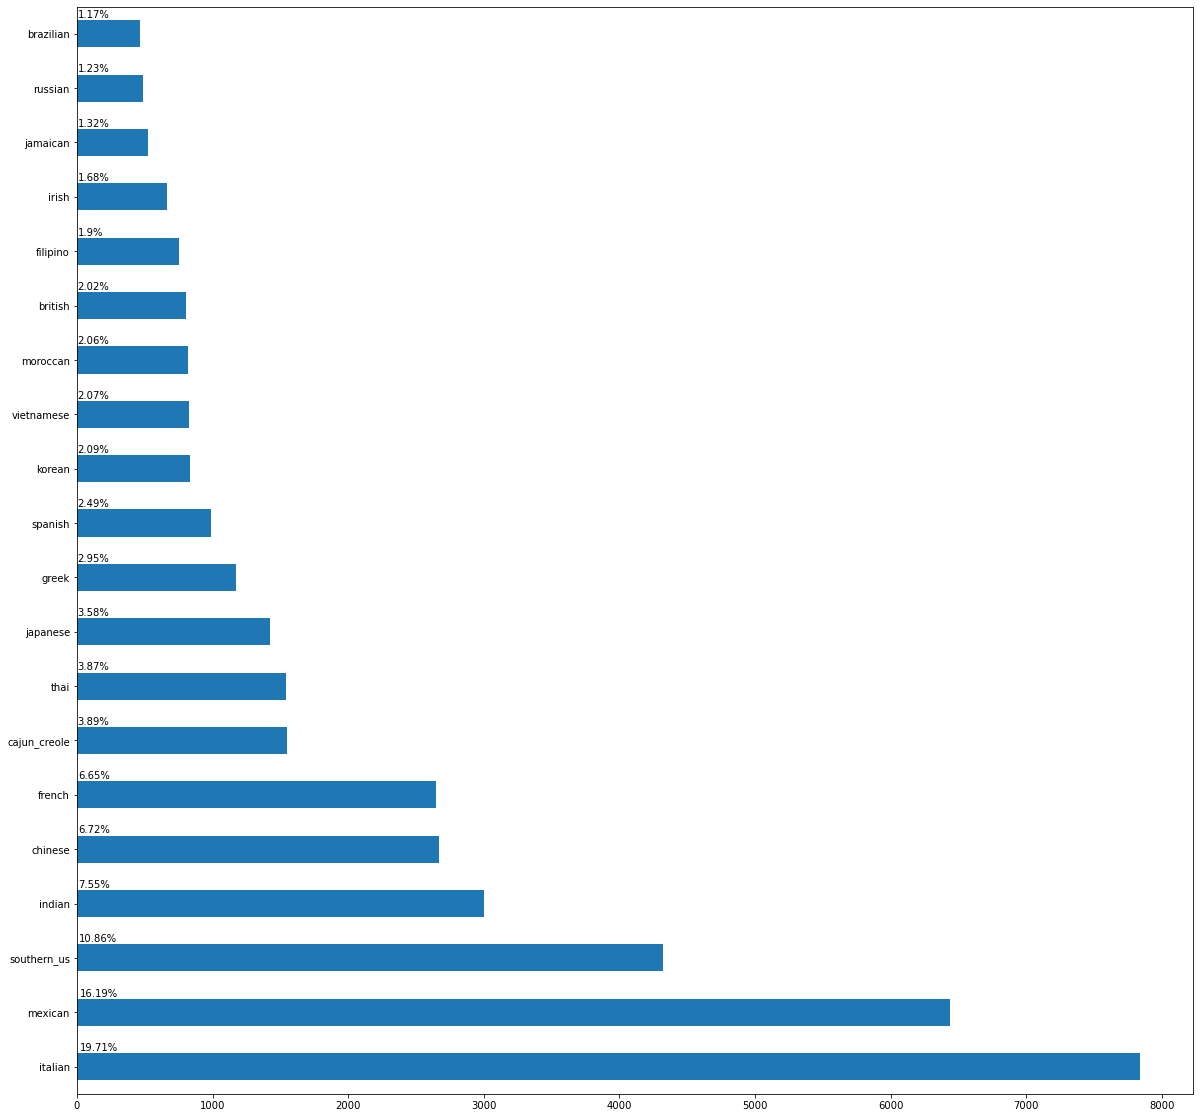

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
cuisines_counter = round(train_data["cuisine"].value_counts(normalize=True)*100, 2)
for i, value in enumerate(cuisines_counter):
    ax.text(value+2, i+0.3, str(value)+"%")
train_data["cuisine"].value_counts().plot.barh(ax = ax)
plt.show()

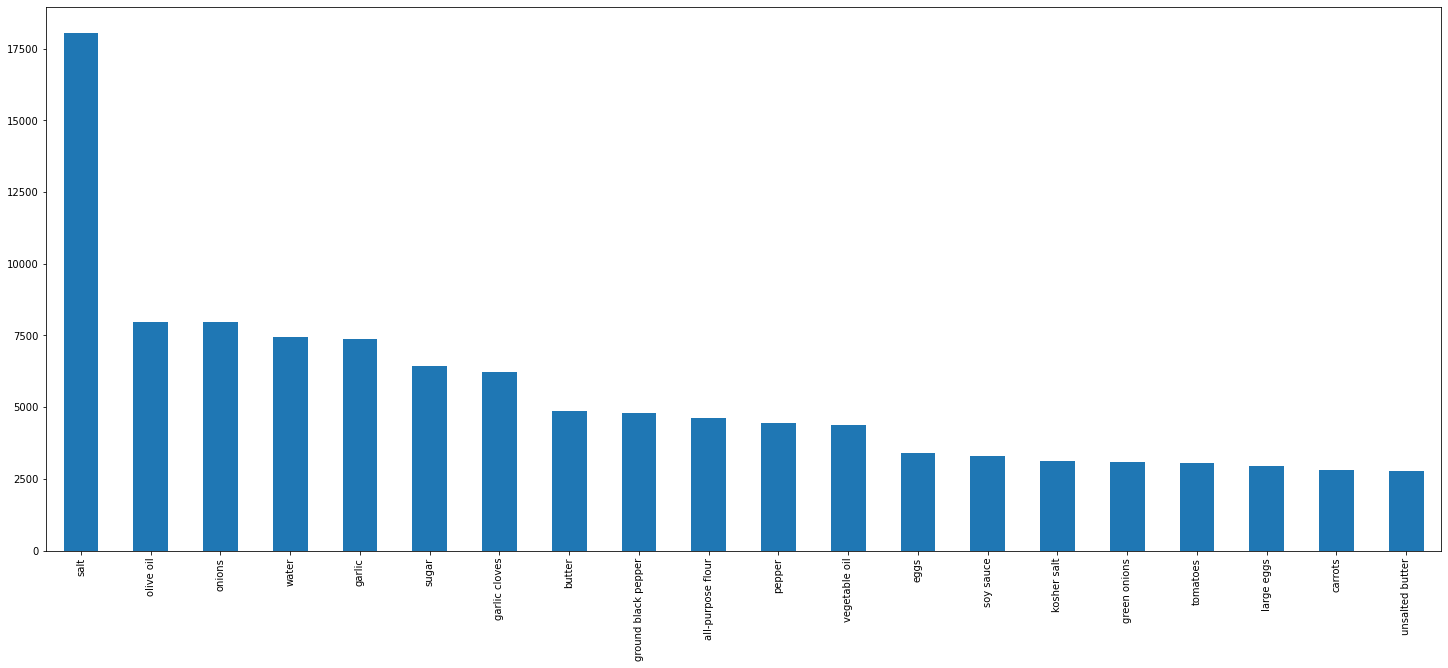

In [7]:
fig, ax = plt.subplots(figsize=(25, 10))
ingredients_counter = defaultdict(int)
for ingredients in train_data['ingredients']:
    for ingredient in ingredients:
        ingredients_counter[ingredient] += 1
        
ingredients_counter = pd.Series(ingredients_counter)
ingredients_counter.sort_values(ascending=False).head(20).plot.bar(ax = ax)

## Create list of ingredients in test_data

In [8]:
ingredients = set()

In [9]:
for i in range(len(test_data)):
    for j in test_data['ingredients'][i]:
        ingredients.add(j)

In [10]:
for i in range(len(train_data)):
    for j in train_data['ingredients'][i]:
        ingredients.add(j)

## Add one-hot encoding

In [11]:
for i in ingredients:
    test_data[i] = np.zeros(len(test_data))

test_data.head()

id                                        ingredients  ketjap  \
0  18009  [baking powder, eggs, all-purpose flour, raisi...     0.0   
1  28583  [sugar, egg yolks, corn starch, cream of tarta...     0.0   
2  41580  [sausage links, fennel bulb, fronds, olive oil...     0.0   
3  29752  [meat cuts, file powder, smoked sausage, okra,...     0.0   
4  35687  [ground black pepper, salt, sausage casings, l...     0.0   

   baby arugula  pasta rotel  diced ham  paratha  boneless skinless chicken  \
0           0.0          0.0        0.0      0.0                        0.0   
1           0.0          0.0        0.0      0.0                        0.0   
2           0.0          0.0        0.0      0.0                        0.0   
3           0.0          0.0        0.0      0.0                        0.0   
4           0.0          0.0        0.0      0.0                        0.0   

   all purpose seasoning  dried minced onion  ...  whole garam masala  \
0                    0.0                 0.0  ...                 0.0   
1                    0.0                 0.0  ...                 0.0   
2                    0.0                 0.0  ...                 0.0   
3                    0.0                 0.0  ...                 0.0   
4                    0.0                 0.0  ...                 0.0   

   mexican chocolate  fresh tomato salsa  collard green leaves  thyme leaves  \
0                0.0                 0.0                   0.0           0.0   
1                0.0                 0.0                   0.0           0.0   
2                0.0                 0.0                   0.0           0.0   
3                0.0                 0.0                   0.0           0.0   
4                0.0                 0.0                   0.0           0.0   

   Flora Original  Southern Comfort Liqueur  sports drink  whole wheat rotini  \
0             0.0                       0.0           0.0                 0.0   
1             0.0                       0.0           0.0                 0.0   
2             0.0                       0.0           0.0                 0.0   
3             0.0                       0.0           0.0                 0.0   
4             0.0                       0.0           0.0                 0.0   

   pita bread  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 7139 columns]

In [12]:
for i in ingredients:
    train_data[i] = np.zeros(len(train_data))
    
train_data.head()

id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   

   ketjap  baby arugula  pasta rotel  diced ham  paratha  \
0     0.0           0.0          0.0        0.0      0.0   
1     0.0           0.0          0.0        0.0      0.0   
2     0.0           0.0          0.0        0.0      0.0   
3     0.0           0.0          0.0        0.0      0.0   
4     0.0           0.0          0.0        0.0      0.0   

   boneless skinless chicken  all purpose seasoning  ...  whole garam masala  \
0                        0.0                    0.0  ...                 0.0   
1                        0.0                    0.0  ...                 0.0   
2                        0.0                    0.0  ...                 0.0   
3                        0.0                    0.0  ...                 0.0   
4                        0.0                    0.0  ...                 0.0   

   mexican chocolate  fresh tomato salsa  collard green leaves  thyme leaves  \
0                0.0                 0.0                   0.0           0.0   
1                0.0                 0.0                   0.0           0.0   
2                0.0                 0.0                   0.0           0.0   
3                0.0                 0.0                   0.0           0.0   
4                0.0                 0.0                   0.0           0.0   

   Flora Original  Southern Comfort Liqueur  sports drink  whole wheat rotini  \
0             0.0                       0.0           0.0                 0.0   
1             0.0                       0.0           0.0                 0.0   
2             0.0                       0.0           0.0                 0.0   
3             0.0                       0.0           0.0                 0.0   
4             0.0                       0.0           0.0                 0.0   

   pita bread  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 7140 columns]

In [13]:
for i in range(len(train_data)):
    for j in train_data['ingredients'][i]:
        train_data[j][i] = 1
        
train_data.head()

<ipython-input-13-c7afd9ab72ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[j][i] = 1


id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   

   ketjap  baby arugula  pasta rotel  diced ham  paratha  \
0     0.0           0.0          0.0        0.0      0.0   
1     0.0           0.0          0.0        0.0      0.0   
2     0.0           0.0          0.0        0.0      0.0   
3     0.0           0.0          0.0        0.0      0.0   
4     0.0           0.0          0.0        0.0      0.0   

   boneless skinless chicken  all purpose seasoning  ...  whole garam masala  \
0                        0.0                    0.0  ...                 0.0   
1                        0.0                    0.0  ...                 0.0   
2                        0.0                    0.0  ...                 0.0   
3                        0.0                    0.0  ...                 0.0   
4                        0.0                    0.0  ...                 0.0   

   mexican chocolate  fresh tomato salsa  collard green leaves  thyme leaves  \
0                0.0                 0.0                   0.0           0.0   
1                0.0                 0.0                   0.0           0.0   
2                0.0                 0.0                   0.0           0.0   
3                0.0                 0.0                   0.0           0.0   
4                0.0                 0.0                   0.0           0.0   

   Flora Original  Southern Comfort Liqueur  sports drink  whole wheat rotini  \
0             0.0                       0.0           0.0                 0.0   
1             0.0                       0.0           0.0                 0.0   
2             0.0                       0.0           0.0                 0.0   
3             0.0                       0.0           0.0                 0.0   
4             0.0                       0.0           0.0                 0.0   

   pita bread  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 7140 columns]

In [14]:
for i in range(len(test_data)):
    for j in test_data['ingredients'][i]:
        test_data[j][i] = 1
       
test_data.head()    

<ipython-input-14-e3ff699eebda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[j][i] = 1


id                                        ingredients  ketjap  \
0  18009  [baking powder, eggs, all-purpose flour, raisi...     0.0   
1  28583  [sugar, egg yolks, corn starch, cream of tarta...     0.0   
2  41580  [sausage links, fennel bulb, fronds, olive oil...     0.0   
3  29752  [meat cuts, file powder, smoked sausage, okra,...     0.0   
4  35687  [ground black pepper, salt, sausage casings, l...     0.0   

   baby arugula  pasta rotel  diced ham  paratha  boneless skinless chicken  \
0           0.0          0.0        0.0      0.0                        0.0   
1           0.0          0.0        0.0      0.0                        0.0   
2           0.0          0.0        0.0      0.0                        0.0   
3           0.0          0.0        0.0      0.0                        0.0   
4           0.0          0.0        0.0      0.0                        0.0   

   all purpose seasoning  dried minced onion  ...  whole garam masala  \
0                    0.0                 0.0  ...                 0.0   
1                    0.0                 0.0  ...                 0.0   
2                    0.0                 0.0  ...                 0.0   
3                    0.0                 0.0  ...                 0.0   
4                    0.0                 0.0  ...                 0.0   

   mexican chocolate  fresh tomato salsa  collard green leaves  thyme leaves  \
0                0.0                 0.0                   0.0           0.0   
1                0.0                 0.0                   0.0           0.0   
2                0.0                 0.0                   0.0           0.0   
3                0.0                 0.0                   0.0           0.0   
4                0.0                 0.0                   0.0           0.0   

   Flora Original  Southern Comfort Liqueur  sports drink  whole wheat rotini  \
0             0.0                       0.0           0.0                 0.0   
1             0.0                       0.0           0.0                 0.0   
2             0.0                       0.0           0.0                 0.0   
3             0.0                       0.0           0.0                 0.0   
4             0.0                       0.0           0.0                 0.0   

   pita bread  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 7139 columns]

In [15]:
test_data['eggs'][0]

1.0

## Remove from test_data ingredients that do not appear in train_data and split train data into X and Y

In [16]:
test_data = test_data[train_data.drop('cuisine',axis=1).columns]

In [17]:
X = train_data.drop(['id','cuisine','ingredients'],axis=1)
Y = train_data['cuisine']

## Split data

In [18]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X, Y, test_size=0.2)

## Train model and test it

In [19]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
accuracy_score(Y_test, prediction)

0.7786297925832809

## Predict data and save them

In [20]:
test_data['cuisine']=model.predict(test_data.drop(['id','ingredients'],axis=1))
result=test_data[['id','cuisine']]
result.set_index('id',inplace=True)
result.to_csv('result.csv')